In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Advertising.csv')

#Data Exploring and preprocessing

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.shape

(200, 5)

In [7]:
df = df.drop(columns=['Unnamed: 0'])

#Data Visualization

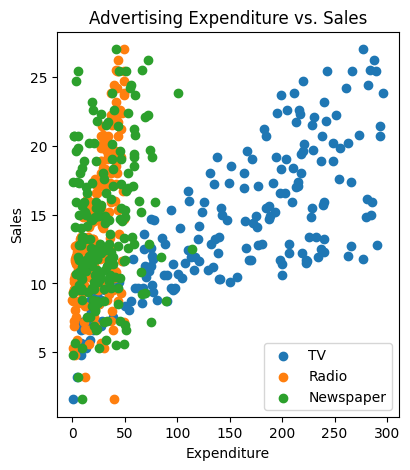

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(df['TV'], df['Sales'], label='TV')
plt.scatter(df['Radio'], df['Sales'], label='Radio')
plt.scatter(df['Newspaper'], df['Sales'], label='Newspaper')
plt.xlabel('Expenditure')
plt.ylabel('Sales')
plt.title('Advertising Expenditure vs. Sales')
plt.legend()

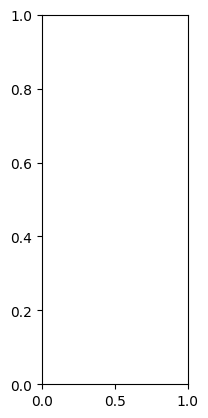

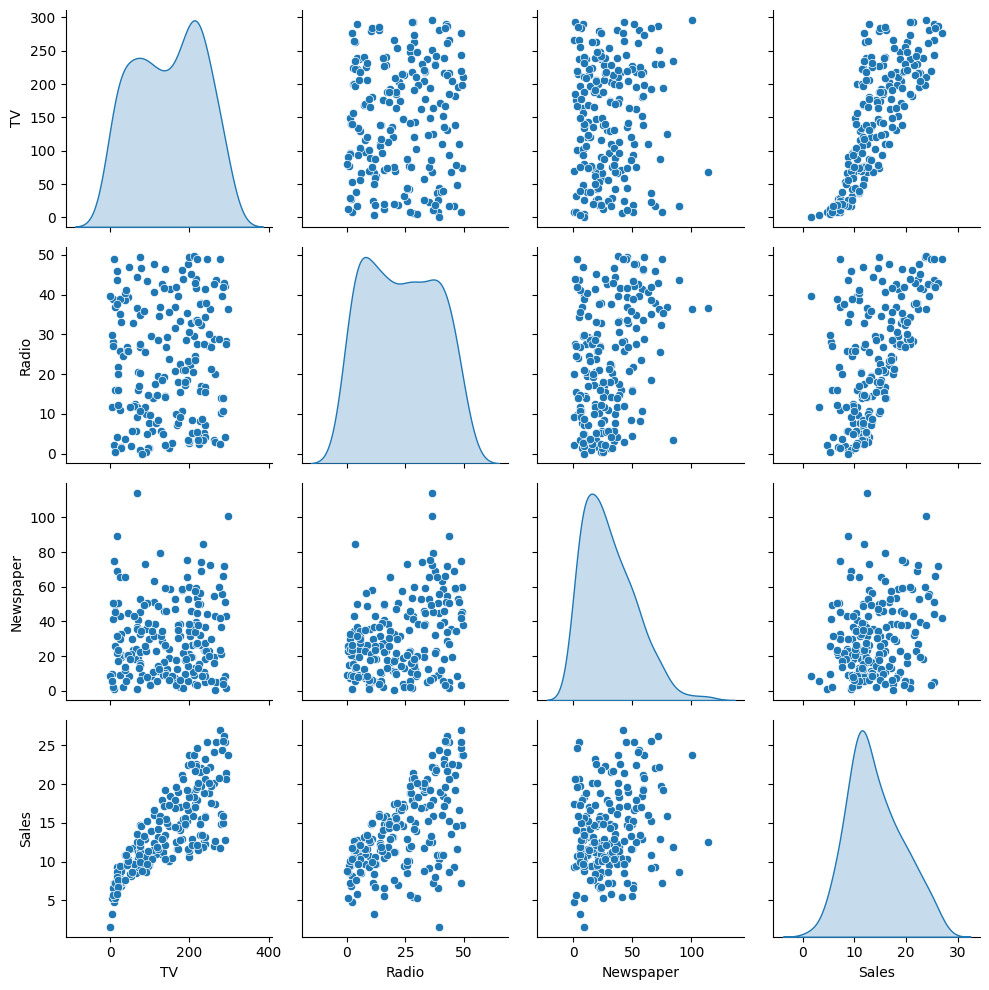

In [9]:
# Pair plot
plt.subplot(133)
sns.pairplot(df, kind='scatter', diag_kind='kde')

plt.tight_layout()
plt.show()

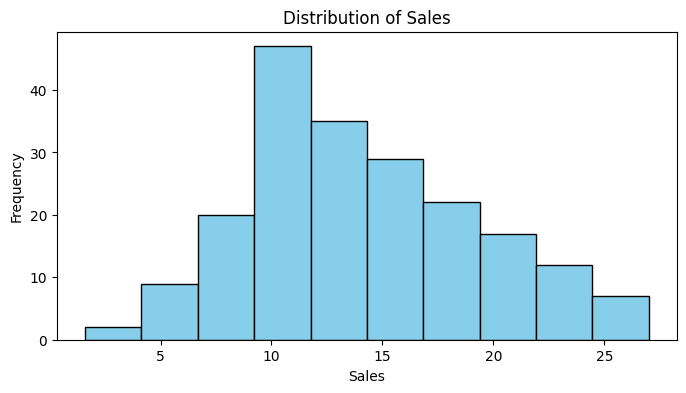

In [10]:
# Histogram for Sales
plt.figure(figsize=(8, 4))
plt.hist(df['Sales'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')

plt.show()

#Implementing the Random Forest Algorithm

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [12]:
# Splitting the data into features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [13]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Creating and training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Making predictions on the test set
y_pred = rf_model.predict(X_test)

In [16]:
# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5907322499999988


In [17]:
from sklearn.metrics import r2_score

# Calculating R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.9812843792541843
